In [802]:
import pandas as pd
import numpy as np
import datetime

In [590]:
# stockinfo = pd.read_csv("price.csv")
# stockinfo.drop_duplicates(subset=["date","TICKER"], inplace=True)

In [591]:
funda = pd.read_csv("funda_annual.csv")
funda.drop_duplicates(subset=["tic","fyear"], inplace=True)

In [597]:
shares = pd.read_csv("shrout.csv")
shares.drop_duplicates(subset=["date","TICKER"], inplace=True)

In [598]:
price = pd.read_csv("prc.csv")
price.drop_duplicates(subset=["date","TICKER"], inplace=True)
price["PRC"] = price_m.PRC.abs()

In [599]:
pool1, pool2, pool3 = price.TICKER.unique(), funda.tic.unique(), shares.TICKER.unique()

In [600]:
pool = [i for i in set(pool3) & set(pool2) & set(pool1) if isinstance(i, str)]

In [601]:
#IB = funda.pivot(index='fyear', columns='tic', values='ibc')
#DA = funda.pivot(index='fyear', columns='tic', values='dp')
CAPX = funda.pivot(index='fyear', columns='tic', values='capx')
CAPX = CAPX[CAPX.index > 2005]
#DV = funda.pivot(index='fyear', columns='tic', values='dv')
OCF = funda.pivot(index='fyear', columns='tic', values='oancf')
OCF = OCF[OCF.index > 2005]
# valid_counts = IB.notnull().sum().sort_values(ascending=False)
# pool = vc[vc > 40].index

valid = OCF.notnull().sum().sort_values() == 14
OCF = OCF[valid[valid].index].dropna(how="all")

valid = CAPX.notnull().sum().sort_values() == 14
CAPX = CAPX[valid[valid].index].dropna(how="all")

pool = list(set(CAPX.columns) & set(OCF.columns) & set(pool))

CAPX, OCF = CAPX[pool], OCF[pool]
FCF = OCF - CAPX

In [602]:
price = price.pivot(index='date', columns='TICKER', values='PRC')
price = price[pool]

In [603]:
shares = shares.pivot(index='date', columns='TICKER', values='SHROUT')
shares = shares[pool]

In [604]:
shares["year"] = shares.index//10000
shares["month"] = shares.index//100
shares_year = shares.groupby("year").mean().fillna(method="bfill").fillna(method="ffill")

In [605]:
price["year"] = price.index//10000
price["month"] = price.index//100
price_year = price.groupby("year").median().fillna(method="bfill").fillna(method="ffill")

In [606]:
fcf_per_share = 1000 * FCF / shares_year

In [607]:
pcf = fcf_per_share / price_year

In [608]:
fcf_per_share["MSFT"]

fyear
2006.0    1.275732
2007.0    1.637524
2008.0    2.017528
2009.0    1.790599
2010.0    2.552795
2011.0    2.931499
2012.0    3.491981
2013.0    2.945187
2014.0    3.239986
2015.0    2.873754
2016.0    3.193846
2017.0    4.067090
2018.0    4.198347
2019.0    5.002744
Name: MSFT, dtype: float64

In [609]:
hist_mean = pcf.mean().sort_values()

In [610]:
filter_robust = ((hist_mean > hist_mean.quantile(0.02)) & (hist_mean < hist_mean.quantile(0.98)))

In [611]:
pool = filter_robust[filter_robust].index

In [612]:
factor = pcf[pool]

In [613]:
factor = factor[pool].iloc[:-1]

,FLY,NCTY,DCTH,CVTI,FVE,ACY,AER,SBOW,RHE,GNK,...,WACLY,RTW,ASX,VIAC,LB,APEX,TGS,MTL,SNE,NGG
fyear,,,,,,,,,,,,,,,,,,,,,
2006.0,-1.177590,0.233242,-0.102807,-0.667105,-0.772236,0.245052,-0.320301,-0.464479,-0.022462,0.004906,...,0.253400,0.148472,5.787337,7.980778,0.256249,6.850026,4.237327,0.270209,0.043993,1.390036
2007.0,-0.378138,0.097011,-0.058483,-0.272498,-0.126393,-0.717489,-0.294692,-0.640089,-0.222680,-0.437289,...,0.489856,1.164179,2.362903,8.029001,0.080091,0.616643,1.228172,0.054252,0.322614,0.465466
2008.0,-0.991393,0.309803,-0.156944,-0.903500,-0.673840,0.074144,-1.132132,-0.303875,-0.007358,-0.139764,...,0.194414,-2.340011,2.064634,0.070779,2.277652,2.017621,1.516197,0.343586,-0.146998,0.355899
2009.0,0.560020,-0.142464,-0.116993,-1.647543,-0.435220,0.616457,-2.086891,0.036473,0.255405,-0.107076,...,0.274264,20.089654,0.900025,0.028686,5.856620,1.739026,2.271124,-0.043484,1.706758,2.420880
2010.0,0.197717,-0.403241,-0.082786,-0.780134,0.411835,-0.157224,-1.113587,-0.331771,-0.456398,-1.267138,...,0.412588,-2.964571,0.532020,0.061401,5.236046,1.581244,0.716748,-0.473214,1.269711,3.419711
2011.0,0.199950,-0.382954,-0.184516,-0.984866,-0.072726,-0.237984,-0.102672,-0.463449,-0.478279,0.090347,...,0.434909,-0.103370,0.316140,0.062806,2.994833,0.849123,0.947012,-0.364078,0.761735,1.752726
2012.0,0.335951,-0.881152,-0.495367,0.256724,-0.014701,-0.323749,-0.236113,-1.552639,-0.822949,-0.154949,...,1.074230,0.046095,-1.432417,0.066065,0.042498,1.181074,1.986168,0.421625,1.871916,0.762522
2013.0,-1.045224,-1.144066,-0.858674,-1.217335,-0.097032,-0.602253,-0.638777,-0.802059,0.110566,-1.293007,...,1.334944,0.045177,0.921133,0.067842,0.031024,1.015162,2.817690,-0.860490,3.430457,1.515324
2014.0,-1.184092,-0.957657,-0.197178,-0.555363,-0.095997,-2.829851,-0.032302,-0.280169,-1.694114,-1.472828,...,1.927828,-0.073769,0.331671,0.045242,0.062983,1.248531,1.495294,1.740773,2.587416,2.001221


In [614]:
price_daily = stockinfo.pivot(index='date', columns='TICKER', values='PRC')

In [615]:
pool = list(set(price_daily.columns) & set(pool)) ; len(pool)

1960

In [621]:
price_daily = price_daily.abs()[pool]

In [831]:
r = ((price_daily.shift(-1) / price_daily) - 1).fillna(0)

In [850]:
num = 6
group = (((factor.rank(axis=1))/(factor.shape[1]+1))*num)//1
#group["year"] = group.index

In [851]:
r[r>10] = 0

In [860]:
factor.mean().sort_values()[:10]

ACY    -0.602902
FLY    -0.597239
RHE    -0.560351
CVTI   -0.541036
NCTY   -0.525217
AER    -0.514432
DCTH   -0.509139
SBOW   -0.471945
GNK    -0.463746
ATV    -0.448109
dtype: float64

In [852]:
def sim(g_id):
    mask = (group == g_id)
    mask["year"] = mask.index + 1
    full_df = pd.DataFrame(r.index.values//10000, columns=["year"])
    full_mask = pd.merge(full_df, mask, how="left", on="year").drop("year",axis=1)
    full_mask.index = r.index
    group_r = (r * full_mask).sum(axis=1) / (full_mask).sum(axis=1)
    return group_r.cumsum().rename(g_id)

In [853]:
result = pd.concat([sim(i) for i in range(num)], axis=1)

In [854]:
result.index = [datetime.datetime.strptime(str(i),"%Y%m%d") for i in result.index]

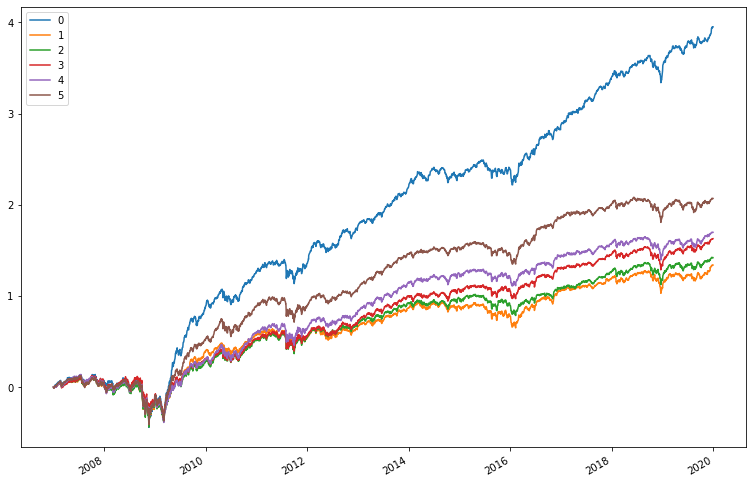

In [856]:
result.plot(figsize=(13,9))